In [1]:
from tensorflow.keras.layers import Dense, InputLayer, Reshape
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train_mod = X_train.astype(float) / 255

In [9]:
X_train_mod.max()

1.0

In [46]:
encoder = Sequential()
encoder.add(InputLayer(input_shape=(28, 28)))
encoder.add(Reshape([784]))
encoder.add(Dense(400, activation="tanh"))
encoder.add(Dense(100, activation="tanh"))
encoder.add(Dense(50, activation="tanh"))

In [47]:
encoder.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_17 (Dense)             (None, 50)                5050      
Total params: 359,150
Trainable params: 359,150
Non-trainable params: 0
_________________________________________________________________


In [48]:
decoder = Sequential()
decoder.add(InputLayer(input_shape=(50,)))
decoder.add(Dense(100, activation="tanh"))
decoder.add(Dense(400, activation="tanh"))
decoder.add(Dense(784, activation="tanh"))
decoder.add(Reshape([28, 28]))

In [49]:
autoencoder = Sequential()
autoencoder.add(InputLayer(input_shape=(28, 28)))
autoencoder.add(encoder)
autoencoder.add(decoder)

In [50]:
autoencoder.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 50)                359150    
_________________________________________________________________
sequential_10 (Sequential)   (None, 28, 28)            359884    
Total params: 719,034
Trainable params: 719,034
Non-trainable params: 0
_________________________________________________________________


In [51]:
autoencoder.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

In [52]:
autoencoder.fit(X_train_mod, X_train_mod, epochs=10, steps_per_epoch=10)

Epoch 1/10
10/10 [==============================] - 7s 671ms/step - loss: 0.0910 - accuracy: 0.0648
Epoch 2/10
10/10 [==============================] - 6s 641ms/step - loss: 0.0614 - accuracy: 0.1001
Epoch 3/10
10/10 [==============================] - 6s 616ms/step - loss: 0.0506 - accuracy: 0.1285
Epoch 4/10
10/10 [==============================] - 6s 626ms/step - loss: 0.0438 - accuracy: 0.1527
Epoch 5/10
10/10 [==============================] - 6s 624ms/step - loss: 0.0388 - accuracy: 0.1773
Epoch 6/10
10/10 [==============================] - 6s 622ms/step - loss: 0.0350 - accuracy: 0.1912
Epoch 7/10
10/10 [==============================] - 6s 608ms/step - loss: 0.0323 - accuracy: 0.2021
Epoch 8/10
10/10 [==============================] - 6s 610ms/step - loss: 0.0301 - accuracy: 0.2098
Epoch 9/10
10/10 [==============================] - 6s 619ms/step - loss: 0.0282 - accuracy: 0.2164
Epoch 10/10
10/10 [==============================] - 6s 606ms/step - loss: 0.0268 - accuracy: 0.2233

In [56]:
output = autoencoder.predict(X_train_mod[:10])

In [57]:
import matplotlib.pyplot as plt

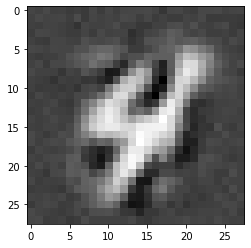

In [60]:
plt.imshow(output[9], cmap="gray")

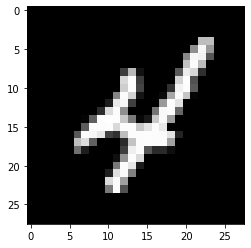

In [61]:
plt.imshow(X_train_mod[9], cmap="gray")

In [62]:
encode = encoder.predict(X_train_mod)

In [63]:
decode = decoder.predict(encode)